### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('coupons.csv')

In [ ]:
data.head()

2. Investigate the dataset for missing or problematic data.

In [9]:
data.info()

#Are there too many duplicate rows?
print("Number of duplicate rows:", data.duplicated().sum())

#How many rows have NaNs?
rows_with_nan = data.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", rows_with_nan)

#How many columns have NaNs?
columns_with_nan = data.isnull().any(axis=0).sum()
print("Number of Columns with NaN values:", columns_with_nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#drop the duplicates
data_no_duplicates = data.drop_duplicates()

#drop the car column as most entries are missing
data_no_duplicates.drop('car', axis=1, inplace=True)

#filter any rows in the 'Y' column which do not have 0 or 1 value or NaN
data_no_duplicates = data_no_duplicates.dropna(subset=['Y'])
data_no_duplicates = data_no_duplicates[data_no_duplicates['Y'].isin([0, 1])]

data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

<ipython-input-11-1ce79090faf4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates.drop('car', axis=1, inplace=True)


4. What proportion of the total observations chose to accept the coupon?





In [12]:
#count the number of entries in column 'Y'
total = len(data_no_duplicates['Y'])

#count the number of entries with '1' (i.e. accepted) in column 'Y'
accepted = sum(data_no_duplicates['Y'])

#proportion of the total observations chose to accept the coupon
proportion_accepted = accepted/total

print("Proportion of the  observations that chose to accept the coupon: ", proportion_accepted)

Proportion of the  observations that chose to accept the coupon:  0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

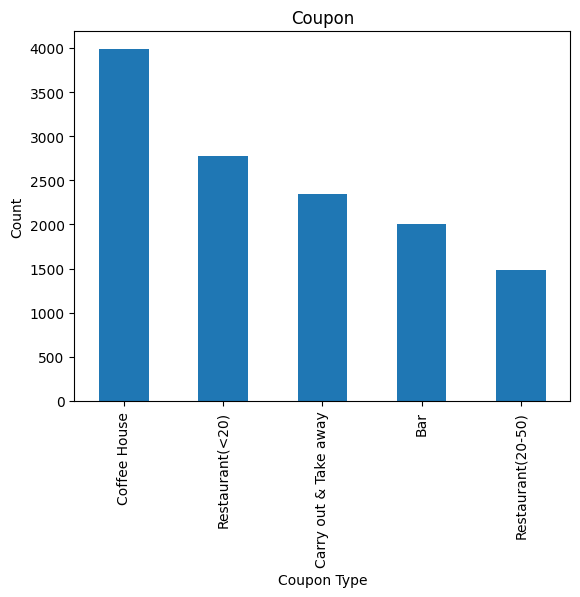

<Figure size 640x480 with 0 Axes>

In [140]:
#count the frequency of each coupon
coupon_counts = data_no_duplicates['coupon'].value_counts()

# Create a bar plot of the coupon counts
coupon_counts.plot(kind='bar')
plt.title('Coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()
plt.savefig("coupon_frequency.png")

6. Use a histogram to visualize the temperature column.

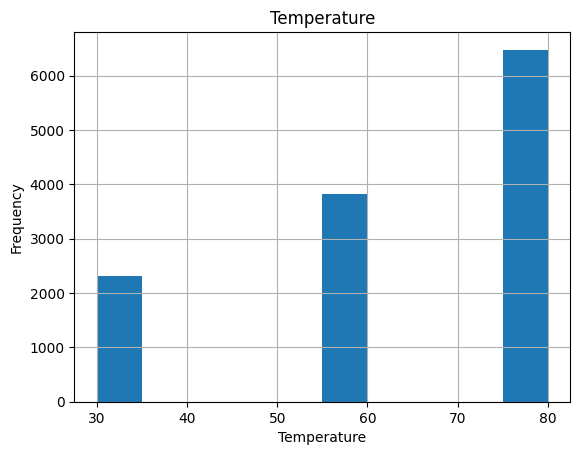

<Figure size 640x480 with 0 Axes>

In [139]:
# histogram to visualize the temperature column.
data_no_duplicates['temperature'].hist()
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
plt.savefig("temperature.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_coupons  = data_no_duplicates.loc[data_no_duplicates['coupon'] == 'Bar']
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [16]:
#proportion of the total observations chose to accept the bar coupon
bar_coupons_accepted = sum(bar_coupons['Y'])/len(bar_coupons['Y'])

print("Proportion of the  observations that chose to accept the bar coupon: ", bar_coupons_accepted)

Proportion of the  observations that chose to accept the bar coupon:  0.4099502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month\ to those who went more.


In [20]:
# filter any rows that does not have valid entry in 'Bar' column
bar_valid_entries = bar_coupons.dropna(subset=['Bar'])

# Approach #1
#############
# Categorize bar visits
bar_valid_entries['bar_visit_group'] = bar_valid_entries['Bar'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')

# Calculate acceptance rates by group
acceptance_rates = bar_valid_entries.groupby('bar_visit_group')['Y'].mean()

# Print the acceptance rates
print(acceptance_rates)

# Approach #2
#############

#filter people who went to bar 3 or less times
went_to_bar_3_or_less  = bar_valid_entries.loc[bar_valid_entries['Bar'].isin(['never', 'less1', '1~3'])]

#count the number of entries
total_3_or_less = len(went_to_bar_3_or_less)

#count the number of entries with '1' (i.e. accepted) in column 'Y'
accepted_3_or_less = sum(went_to_bar_3_or_less['Y'])

#proportion of the total chose to accept the coupon
proportion_accepted_3_or_less = accepted_3_or_less/total_3_or_less

print("Acceptance rate (<=3 in bar): ", proportion_accepted_3_or_less)

#filter people who went to bar more than 3 times
went_to_bar_more_than_3  = bar_valid_entries.loc[data_no_duplicates['Bar'].isin(['4~8', 'gt8'])]

#count the number of entries
total_more_than_3 = len(went_to_bar_more_than_3['Y'])

#count the number of entries with '1' (i.e. accepted) in column 'Y'
accepted_more_than_3 = sum(went_to_bar_more_than_3['Y'])

#proportion of the total observations chose to accept the coupon
proportion_accepted_more_than_3 = accepted_more_than_3/total_more_than_3

print("Acceptance rate (>3 in bar): ", proportion_accepted_more_than_3)

bar_visit_group
High    0.768844
Low     0.370391
Name: Y, dtype: float64
Acceptance rate (<=3 in bar):  0.370391061452514
Acceptance rate (>3 in bar):  0.7688442211055276


<ipython-input-20-01e496145ecd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_valid_entries['bar_visit_group'] = bar_valid_entries['Bar'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
#find number of drivers over age of 25
over_25 = bar_valid_entries.loc[~bar_valid_entries['age'].isin(['21','below21'])]

#find number of drivers who go to bar more than once a month
drivers = over_25.loc[~over_25['Bar'].isin(['never','less1']) ]

#coupon acceptance rate
acceptance_rate = sum(drivers['Y'])/len(drivers['Y'])
print("Acceptance Rate age > 25 & Bar more than once a month:", acceptance_rate)


Acceptance Rate age > 25 & Bar more than once a month: 0.6952380952380952


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [52]:
# ppl who go to bar more than a month
ans1 = bar_valid_entries.loc[~bar_valid_entries['Bar'].isin(['never','less1'])]

# ppl who did not have kid as a passenger
ans2 = ans1.loc[~ans1['passanger'].str.startswith('Kid')]

# ppl who had occupations other than farming, fishing, or forestry
ans3 = ans2.loc[~ans2['passanger'].str.contains('Farming')]

#coupon acceptance rate
acceptance_rate = sum(ans3['Y'])/len(ans3['Y'])
print("Acceptance Rate >1 bar & Passenger not kid & non-farming:", acceptance_rate)

Acceptance Rate >1 bar & Passenger not kid & non-farming: 0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [125]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
ans1 = bar_valid_entries.loc[~bar_valid_entries['Bar'].isin(['never','less1'])]
ans2 = ans1.loc[~ans1['passanger'].str.startswith('Kid')]
ans3 = ans2.loc[~ans2['maritalStatus'].str.startswith('Widowed')]

#coupon acceptance rate
acceptance_rate = sum(ans3['Y'])/len(ans3['Y'])
print("Acceptance Rate >1 bar & Passenger not kid & !widow:", acceptance_rate)

#go to bars more than once a month and are under the age of 30
ans1 = bar_valid_entries.loc[~bar_valid_entries['Bar'].isin(['never','less1'])]
ans2 = ans1.loc[ans1['age'].isin(['21','below21', '26'])]

#coupon acceptance rate
acceptance_rate = sum(ans2['Y'])/len(ans2['Y'])
print("Acceptance Rate >1 bar & Age <30", acceptance_rate)

#go to cheap restaurants more than 4 times a month and income is less than 50K.

# Function to extract the lower and upper bound of income
def extract_lower_upper_bound(income_range):
    if 'Less than' in income_range:
        lower_bound = 0
        upper_bound = int(income_range.split()[-1].strip('$'))
    elif 'or More' in income_range:
        lower_bound = int(income_range.split()[0].strip('$'))
        upper_bound = None
    else:
        lower_bound = int(income_range.split(' - ')[0].strip('$'))
        upper_bound = int(income_range.split(' - ')[1].strip('$'))
    return lower_bound, upper_bound

#ppl who go to cheap restaurants more than 4 times a month
ans1 = bar_valid_entries.dropna(subset=['RestaurantLessThan20'])
ans2 = ans1.loc[ans1['RestaurantLessThan20'].isin(['4~8','gt8'])]

#filter ppl who are low income <50k
ans2[['income_lower_bound', 'income_upper_bound']] = ans2['income'].apply(extract_lower_upper_bound).apply(pd.Series)
ans3 = ans2.loc[ans2['income_upper_bound'] < 50000]

#coupon acceptance rate
acceptance_rate = sum(ans3['Y'])/len(ans3['Y'])
print("Acceptance Rate low income, cheap restaurants", acceptance_rate)
ans3['income_upper_bound'].value_counts()
#ans3['income_lower_bound'].value_counts()


Acceptance Rate >1 bar & Passenger not kid & !widow: 0.7132486388384754
Acceptance Rate >1 bar & Age <30 0.7217391304347827
Acceptance Rate low income, cheap restaurants 0.45722713864306785


<ipython-input-125-a9d031cf88ea>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans2[['income_lower_bound', 'income_upper_bound']] = ans2['income'].apply(extract_lower_upper_bound).apply(pd.Series)
<ipython-input-125-a9d031cf88ea>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans2[['income_lower_bound', 'income_upper_bound']] = ans2['income'].apply(extract_lower_upper_bound).apply(pd.Series)


,count
income_upper_bound,
24999.0,99
49999.0,93
37499.0,74
12500.0,73


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#1) Proportion of the  observations that chose to accept the bar coupon:  0.4099502487562189
#2) Acceptance rate between those who went to a bar 3 or fewer times a month: 0.370391061452514
#3) Acceptance rate between those who went to a bar more than 3 times a month:  0.7688442211055276
#4) Acceptance Rate age > 25 & Bar more than once a month: 0.6952380952380952
#5) Acceptance Rate >1 time bar & Passenger not kid & non-farming: 0.7132486388384754
#6.1) Acceptance Rate >1 bar & Passenger not kid & !widow: 0.7132486388384754
#6.2) Acceptance Rate >1 bar & Age <30 0.7217391304347827
#6.3) Acceptance Rate low income, cheap restaurants 0.45722713864306785

#Conclusion:
#a) People went to went bar more than 3 times a month were the most likely to accept a Bar coupon
#b) People who went to bar at least once a month had reaonable chance of accepting the coupon and acceptance rate seems to higher in younger people (< 25 years)


### Independent Investigation

> Add blockquote



Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [129]:
#Lets do a similar exercise with the 'Coffee House' Coupon
coffee_coupons  = data_no_duplicates.loc[data_no_duplicates['coupon'] == 'Coffee House']
coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_visit_group
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,Low
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,Low
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,Low
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,Low
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,Low


In [130]:
#What proportion of Coffee House coupons were accepted?

coffee_coupons_accepted = sum(coffee_coupons['Y'])/len(coffee_coupons['Y'])
print("Acceptance rate of coffee coupon: ", coffee_coupons_accepted)

Acceptance rate of coffee coupon:  0.4986212083228879


In [132]:
#Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.
coffee_coupons['CoffeeHouse'].value_counts()

# filter any rows that does not have valid entry in 'CoffeeHouse' column
coffee_valid_entries = coffee_coupons.dropna(subset=['CoffeeHouse'])

# Categorize coffee visits
coffee_valid_entries['coffee_visit_group'] = coffee_valid_entries['CoffeeHouse'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')

# Calculate acceptance rates by group
acceptance_rates = coffee_valid_entries.groupby('coffee_visit_group')['Y'].mean()

# Print the acceptance rates
print(acceptance_rates)

coffee_visit_group
High    0.675000
Low     0.448469
Name: Y, dtype: float64


<ipython-input-132-9a86ab045040>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_valid_entries['coffee_visit_group'] = coffee_valid_entries['CoffeeHouse'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')


In [135]:
# Compare the acceptance rate between drivers who go to a Coffee House more than once a month and
# are over the age of 25 to the all others. Is there a difference?

#find number of coffee drinkers over age of 25
over_25 = coffee_valid_entries.loc[~coffee_valid_entries['age'].isin(['21','below21'])]

#find number of coffee drinkers who go to coffee house more than once a month
coffee_drinkers = over_25.loc[~over_25['CoffeeHouse'].isin(['never','less1']) ]

#coupon acceptance rate
acceptance_rate = sum(coffee_drinkers['Y'])/len(coffee_drinkers['Y'])
print("Acceptance Rate age > 25 & Coffee House more than once a month:", acceptance_rate)


Acceptance Rate age > 25 & Coffee House more than once a month: 0.638109305760709


In [138]:
# How does the acceptance rate differ based on the destination like work, home?

coffee_valid_entries['destination'].value_counts()

#find number of coffee drinkers headed home
home_destination = coffee_valid_entries.loc[coffee_valid_entries['destination'].isin(['Home'])]
work_destination = coffee_valid_entries.loc[coffee_valid_entries['destination'].isin(['Work'])]
neither_work_or_home = coffee_valid_entries.loc[coffee_valid_entries['destination'].isin(['No Urgent Place'])]

#coupon acceptance rate
acceptance_rate_home = sum(home_destination['Y'])/len(home_destination['Y'])
acceptance_rate_work = sum(work_destination['Y'])/len(work_destination['Y'])
acceptance_rate_misc = sum(neither_work_or_home['Y'])/len(neither_work_or_home['Y'])

print("Acceptance Rate for coffee coupon with destination as Home ", acceptance_rate_home)
print("Acceptance Rate for coffee coupon with destination as Work ", acceptance_rate_work)
print("Acceptance Rate for coffee coupon with destination as neither Home nor Work ", acceptance_rate_misc)



Acceptance Rate for coffee coupon with destination as Home  0.3641364136413641
Acceptance Rate for coffee coupon with destination as Work  0.44567627494456763
Acceptance Rate for coffee coupon with destination as neither Home nor Work  0.5807217473884141


In [ ]:
# Summary
# Acceptance rate of coffee coupon:  0.4986212083228879
# Acceptance rate between those who went to a coffee house 3 or fewer times a month 0.448469
# Acceptance rate between those who went to a coffee house more than 3 times 0.675000
# Acceptance Rate age > 25 & Coffee House more than once a month: 0.638109305760709
# Acceptance Rate for coffee coupon with destination as Home  0.3641364136413641
# Acceptance Rate for coffee coupon with destination as Work  0.44567627494456763
# Acceptance Rate for coffee coupon with destination as neither Home nor Work  0.5807217473884141

#Hypothesis
# Acceptance rate is higher for coffee coupon than bar coupons
# People who visited coffee house more than 3 times a month were most likely to accept the coffee coupon
# Also, the acceptance rate seems higher if the desitination was not work or home